In [10]:
import numpy as np #i just like to have this
import pandas as pd #dfs lul
import tiktoken # for counting tokens
import openai #for generating embeddings
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for plotting
sns.set_style("darkgrid")

In [11]:
#reference: https://github.com/openai/openai-cookbook/blob/297c53430cad2d05ba763ab9dca64309cb5091e9/examples/Embedding_Wikipedia_articles_for_search.ipynb
gsm_train = pd.read_json(r"C:\Users\kaush\Desktop\fuck_you_chatPAL\pal\datasets\gsm_train.jsonl", lines=True)
gsm_test = pd.read_json(r"C:\Users\kaush\Desktop\fuck_you_chatPAL\pal\datasets\gsm_test.jsonl", lines=True)
df = gsm_train
questions = df["question"].values.tolist()
GPT_MODEL = "gpt-3.5-turbo" #for tokenizer selection

In [12]:
def num_tokens(text: str, model: str = GPT_MODEL) -> int:
    """Return the number of tokens in a string."""
    encoding = tiktoken.encoding_for_model(model)
    return len(encoding.encode(text))

In [13]:
token_counts = [num_tokens(question) for question in questions]

Mininum tokens to encode: 11
Maximum tokens to encode: 209


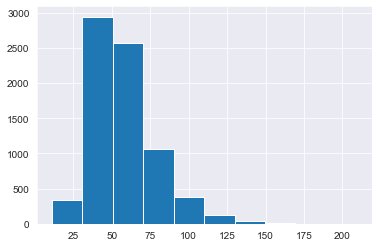

In [14]:
plt.hist(token_counts)
print(f"Mininum tokens to encode: {min(token_counts)}")
print(f"Maximum tokens to encode: {max(token_counts)}")
#GPT 3.5 can use upto 4096 tokens so we are more than ok here.

In [20]:
questions_embeddings_df = pd.DataFrame(questions)
questions_embeddings_df = questions_embeddings_df.rename(columns={0: "question"})

In [22]:
len(questions_embeddings_df)

7473

In [21]:
# calculate embeddings
EMBEDDING_MODEL = "text-embedding-ada-002"  # OpenAI's best embeddings as of Apr 2023
BATCH_SIZE = 1000  # you can submit up to 2048 embedding inputs per request

embeddings = []
for batch_start in range(0, len(questions), BATCH_SIZE):
    batch_end = batch_start + BATCH_SIZE
    batch = questions[batch_start:batch_end]
    print(f"Batch {batch_start} to {batch_end-1}")
    response = openai.Embedding.create(model=EMBEDDING_MODEL, input=batch)
    for i, be in enumerate(response["data"]):
        assert i == be["index"]  # double check embeddings are in same order as input
    batch_embeddings = [e["embedding"] for e in response["data"]]
    embeddings.extend(batch_embeddings)

Batch 0 to 999
Batch 1000 to 1999
Batch 2000 to 2999
Batch 3000 to 3999
Batch 4000 to 4999
Batch 5000 to 5999
Batch 6000 to 6999
Batch 7000 to 7999


In [23]:
print(len(embeddings))
print(embeddings[0])
print(len(embeddings[0]))

7473
[-0.014121408574283123, -0.01812637597322464, 0.0247969850897789, -0.052428655326366425, 0.005438562948256731, 0.0031500104814767838, -0.03008926287293434, -0.013627289794385433, -0.019491706043481827, -0.02689049206674099, 0.03229979798197746, 0.022040320560336113, -0.0008712103008292615, 0.004125245846807957, 0.009193219244480133, -0.01992080919444561, 0.0086080776527524, -0.009115200489759445, 0.011657314375042915, -0.012918618507683277, -0.024250853806734085, 0.0055230832658708096, -0.02259945496916771, 0.026266340166330338, -0.023756735026836395, -0.011403752490878105, 0.02480998821556568, -0.0038619323167949915, 0.006433303002268076, -0.012268461287021637, -4.5384003897197545e-05, -0.007457300089299679, -0.01399137731641531, -0.02598027139902115, -0.0434044785797596, -0.007964422926306725, 0.006956679280847311, -0.014108405448496342, 0.0130421482026577, 0.01663101464509964, -0.005714879371225834, 0.010552046820521355, -0.010987652465701103, -0.007957921363413334, -0.02050594

In [24]:
questions_embeddings_df["embedding"] = embeddings

In [25]:
questions_embeddings_df

,question,embedding
0,Natalia sold clips to 48 of her friends in Apr...,"[-0.014121408574283123, -0.01812637597322464, ..."
1,Weng earns $12 an hour for babysitting. Yester...,"[0.010208266787230968, 0.010972762480378151, -..."
2,Betty is saving money for a new wallet which c...,"[0.026983197778463364, -0.006650339812040329, ..."
3,"Julie is reading a 120-page book. Yesterday, s...","[0.007657997775822878, 0.025833748281002045, 0..."
4,James writes a 3-page letter to 2 different fr...,"[0.0032385073136538267, 0.006105619017034769, ..."
...,...,...
7468,"Very early this morning, Elise left home in a ...","[0.027501145377755165, 0.013270754367113113, 0..."
7469,Josh is saving up for a box of cookies. To rai...,"[0.00526996236294508, -0.010956649668514729, 0..."
7470,Colin can skip at six times the speed that Bra...,"[0.008983314968645573, 0.009602399542927742, 0..."
7471,"Janet, a third grade teacher, is picking up th...","[0.022984864190220833, 0.004620400257408619, -..."


In [26]:
questions_embeddings_df.to_csv("./gsm_train_question_embeddings.csv", index=False)